In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn import metrics

In [42]:
ds=pd.read_csv('Auto_Insurance_Claims_amount.csv')
ds.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [43]:
ds.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [44]:
auto=ds.drop(['Customer','State Code','Country','Effective To Date','Total Claim Amount'],axis=1)
auto.shape

(9134, 21)

In [45]:
le=LabelEncoder()
cols=['State','Response', 'Coverage', 'Education','EmploymentStatus', 'Gender',
      'Location Code','Marital Status','Policy Type', 'Policy', 'Claim Reason','Sales Channel',
      'Vehicle Class','Vehicle Size']
for col in cols:
    auto[col]=le.fit_transform(auto[col])


In [46]:
#le.fit_transform(auto['State Code'])
auto.head()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,1,276.351928,0,0,0,1,0,56274,1,1,...,32,5,0,1,0,2,0,0,5,1
1,3,697.953590,0,1,0,4,0,0,1,2,...,13,42,0,8,1,5,3,0,0,1
2,4,1288.743165,0,2,0,1,0,48767,1,1,...,18,38,0,2,1,5,0,0,5,1
3,2,764.586183,0,0,0,4,1,0,1,1,...,18,65,0,7,0,1,0,2,3,1
4,1,281.369258,0,0,0,1,1,43836,0,2,...,12,44,0,1,1,3,0,0,0,1


In [47]:
x=auto.iloc[:,:]
y=ds.iloc[:,-3]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


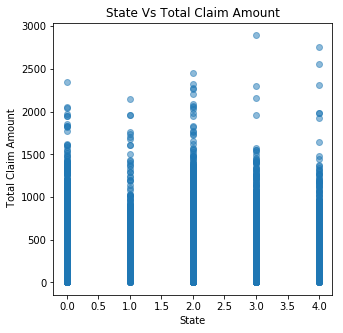

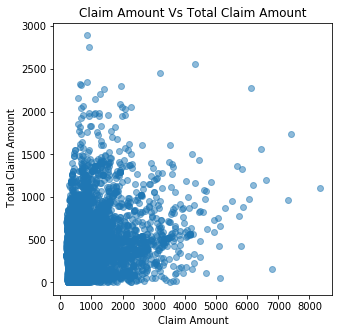

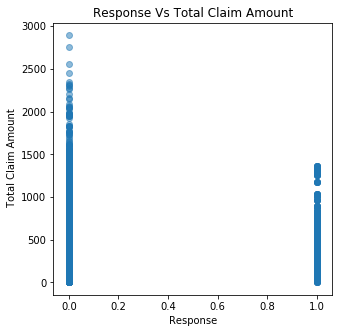

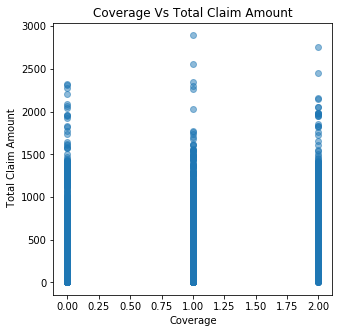

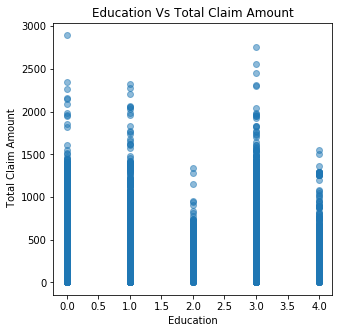

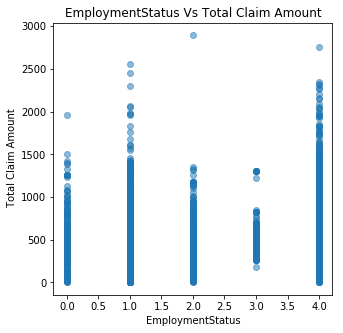

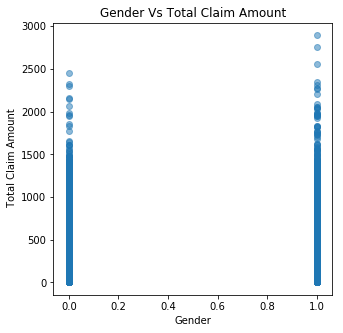

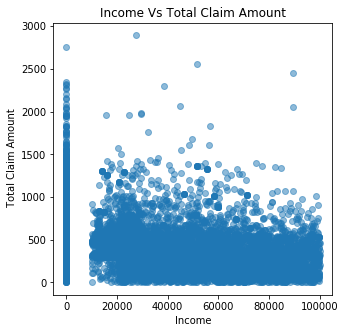

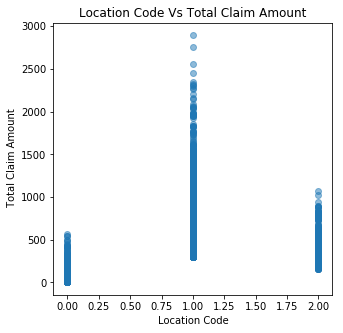

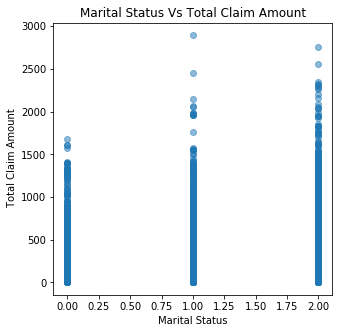

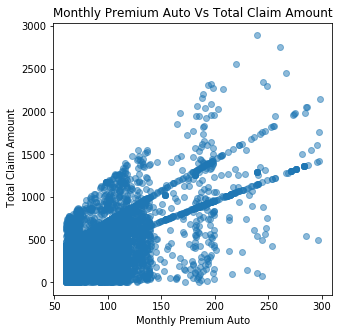

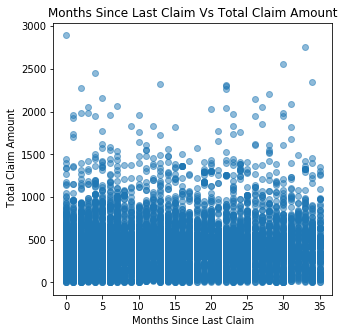

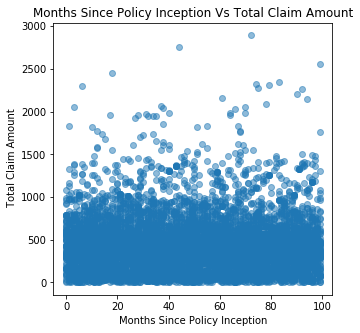

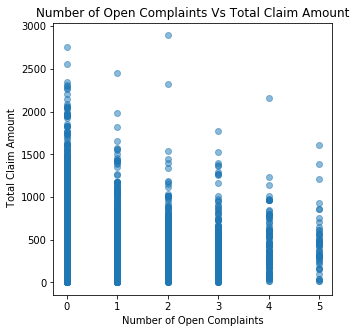

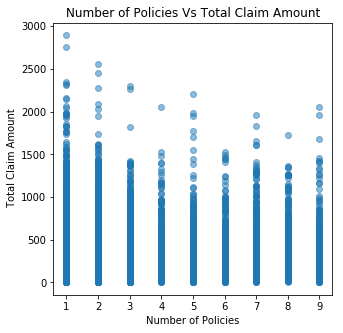

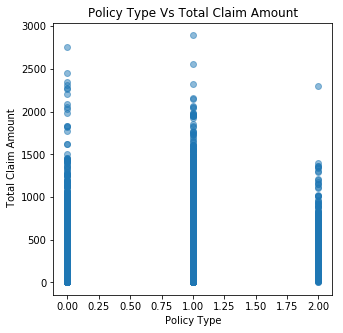

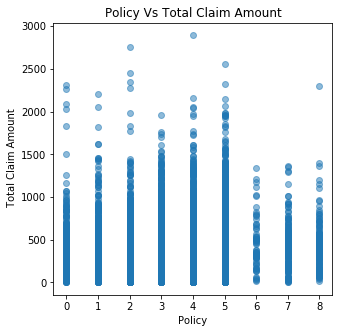

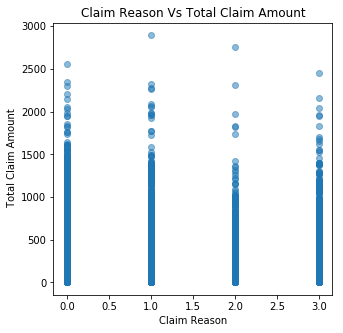

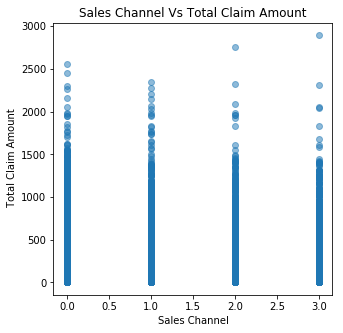

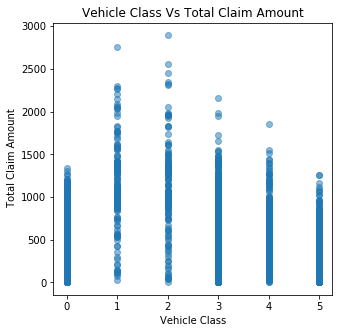

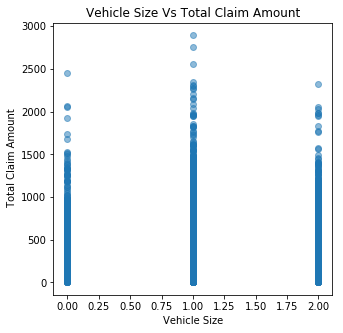

In [48]:
cols=x.columns
def scatter_plot (cols):
    for col in cols:
        x_ax= auto[col]
        y_ax= y
        plt.figure(figsize=(5,5))
        plt.scatter(x_ax,y_ax,alpha=0.5)
        plt.title(col+' Vs Total Claim Amount')
        plt.xlabel(col)
        plt.ylabel(' Total Claim Amount')
scatter_plot(cols)

In [49]:
ss=StandardScaler()
xss=ss.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
lr=LinearRegression()
score=cross_val_score(lr,xss,y,cv=10)
print('Accuracy score is:%0.2f +/- %.2f' %(score.mean(),score.std()*2))

Accuracy score is:0.60 +/- 0.04


In [52]:
lasso=Lasso()
scores=cross_val_score(lasso,xss,y,cv=10)
print('Accuracy score is:%0.2f +/- %.2f' %(scores.mean(),scores.std()*2))

Accuracy score is:0.60 +/- 0.04


In [53]:
ridge=Ridge()
scores=cross_val_score(ridge,xss,y,cv=10)
print('Accuracy score is:%0.2f +/- %.2f' %(scores.mean(),scores.std()*2))

Accuracy score is:0.60 +/- 0.04


In [54]:
rfr=RandomForestRegressor(n_estimators=100,random_state=1)
scores=cross_val_score(rfr,xss,y,cv=10)
print('Accuracy score is:%0.2f +/- %.2f' %(scores.mean(),scores.std()*2))

Accuracy score is:0.84 +/- 0.02


In [55]:
abr=AdaBoostRegressor()
scores=cross_val_score(abr,xss,y,cv=10)
print('Accuracy score is:%0.2f +/- %.2f' %(scores.mean(),scores.std()*2))

Accuracy score is:0.65 +/- 0.08


In [56]:
gbr=GradientBoostingRegressor()
scores=cross_val_score(gbr,xss,y,cv=10)
print('Accuracy score is:%0.2f +/- %.2f' %(scores.mean(),scores.std()*2))

Accuracy score is:0.83 +/- 0.02


In [57]:
svr=SVR(gamma='auto',kernel='poly')
scores=cross_val_score(svr,xss,y,cv=10)
print('Accuracy score is:%0.2f +/- %.2f' %(scores.mean(),scores.std()*2))

Accuracy score is:0.29 +/- 0.03


In [58]:
import pickle
file_name=open('final_model.obj','wb')
pickle.dump(rfr,file_name)
file_name.close()

In [59]:
model=pickle.load(open('final_model.obj','rb'))
pred=cross_val_predict(model,x,y,cv=10)
accuracy = metrics.r2_score(y, pred)
print(accuracy)

0.839639767752111
